# Entrenamiento de perceptrón

Nancy Patricia Girón Muñoz - 19007078

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
path = "/content/drive/My Drive/Entrenamiento Perceptrón/"
file_name = 'data.csv'
print(path + file_name)
dataset = pd.read_csv(path+file_name,encoding='latin-1')
dataset.head()

/content/drive/My Drive/Entrenamiento Perceptrón/data.csv


,x1,x2,label
0,12.882292,10.228199,1
1,12.682271,9.360462,1
2,12.104981,10.580729,1
3,12.473947,10.993459,1
4,11.997386,9.321291,1


Graficamos los datos para observar como es el comportamiento.

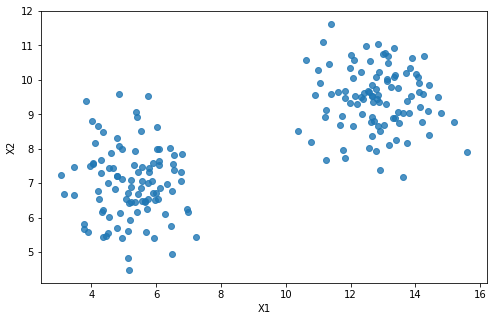

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(dataset.x1[:], dataset.x2[:], alpha=0.8);
plt.xlabel("X1");
plt.ylabel("X2");

Agregamos el termino de bias.

In [33]:
dataset['bias'] = np.ones(len(dataset))
x = np.array(dataset[['bias', 'x1', 'x2']])
y = dataset['label']
dataset.head()

,x1,x2,label,bias
0,12.882292,10.228199,1,1.0
1,12.682271,9.360462,1,1.0
2,12.104981,10.580729,1,1.0
3,12.473947,10.993459,1,1.0
4,11.997386,9.321291,1,1.0


In [0]:
def train_perceptron(x, y, epochs, lr, m):
    w = np.random.standard_normal(size=x.shape[1])
    n = 0        
    while n < epochs:          
        for i in range(len(x)):    
            b = np.dot(x[i], w)
            if b >= m:
              yhat = 1 
            else:
              yhat = 0
            for j in range(len(w)):             
                w[j] = w[j] + lr*(y[i]-yhat)*x[i][j]              
        n += 1
    return w

In [41]:
perceptron = train_perceptron(x, y, 1000, 0.01, 0)
perceptron

array([-2.12616142,  0.43027961, -0.18880203])

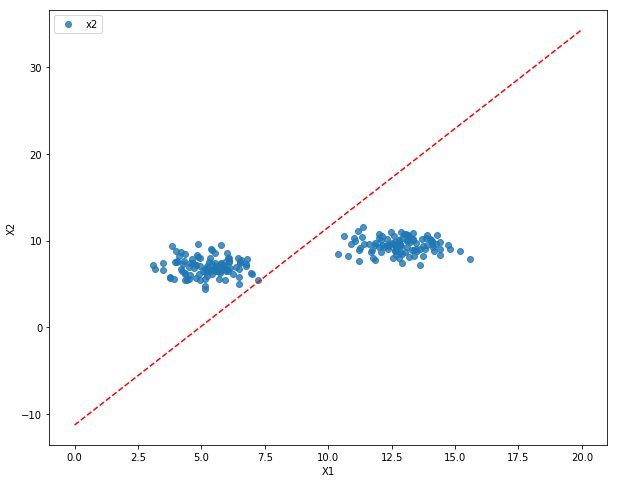

In [45]:
def decision(x1):
    return (-(perceptron[0] + perceptron[1]*x1)/ perceptron[2])
x1 = np.linspace(0,20)
plt.figure(figsize=(10,8))
plt.scatter(dataset.x1[:], dataset.x2[:], alpha=0.8)
plt.plot(x1, np.array([decision(x) for x in x1]),'r--')
plt.xlabel("X1");
plt.ylabel("X2");
plt.legend()
plt.show()